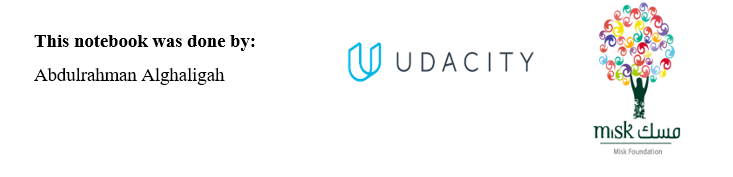


# Project: Investigate TMDb Movie Data                                            

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset contains information about 10,000 movies collected from The Movie Database. There are important columns that we can take advantage of to investigate a significant information to provide it to movies producers. 

In this report I am going to analyse this dataset starting from cleaning it up to make clear visualisations to provide accurate conclusions to three questions which are:

- Which genres are the most popular?
- What kinds of properties are associated with movies that have high revenues?
- Does the movies high budget receive more votes?


In [1]:
#import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I am going to load in the data, check for cleanliness, and then trim and clean  dataset for analysis.

### General Properties

Loading the dataset:
    

In [2]:
df=pd.read_csv('tmdb-movies.csv')# loading the data



Print out a few lines:
    

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Now, I am going to check for duplicates rows and removing them if any:

In [4]:
df. duplicated().sum() # this line for checking if there is a duplicate row in the set


1

The previous cell output shows that there is one duplicate row, which I am going to drop in the next cell.

In [5]:
df.drop_duplicates(inplace = True)# dropping duplicate row

Now let's verify:

In [6]:
df. duplicated().sum()

0

Let's check the columns in the dataset and drop the one that we don't need in our analysis:

In [7]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

Columns like: id, imdb_id and homepage are not necessary for our analysis <br>let's remove any unnecessary column:

In [8]:
df.drop(['imdb_id','homepage','id','cast','tagline','director','overview','production_companies','keywords'],inplace=True,axis=1) #drooping unnecessary columns

Now let's verify:

In [9]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [10]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Now let's check if there is a missing values in the dataset:

In [11]:
df.isnull().sum()# view missing value count for each column


popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

Let's remove the missing values:

In [12]:
df.dropna(inplace=True)# drop rows with missing values

Checks if there are any null values:

In [13]:
df.isnull().sum().any()

False

Let's check the data type of the columns:

In [14]:
df.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

They are all fine except release_year column which need to be converted to datetime type:

In [15]:
df['release_date']=pd.to_datetime(df['release_date']) # converting release_year from string to datetime

let's check the type of release_year after converting it:

In [16]:
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

Let's check revenue and budget columns:

In [17]:
df['revenue']

0        1513528810
1         378436354
2         295238201
3        2068178225
4        1506249360
            ...    
10861             0
10862             0
10863             0
10864             0
10865             0
Name: revenue, Length: 10842, dtype: int64

In [18]:
df['budget']

0        150000000
1        150000000
2        110000000
3        200000000
4        190000000
           ...    
10861            0
10862            0
10863            0
10864            0
10865        19000
Name: budget, Length: 10842, dtype: int64

There are some values with 0 let's replace them by the mean of each of them:

In [19]:
def replace_zero_with_mean(col):
    # This function receives a column and replaces each row with zero value to the mean of that column
        return col.replace(0,col.mean())

In [20]:
df['revenue']=replace_zero_with_mean(df['revenue'])# calling the function 
df['revenue']

0        1.513529e+09
1        3.784364e+08
2        2.952382e+08
3        2.068178e+09
4        1.506249e+09
             ...     
10861    3.991138e+07
10862    3.991138e+07
10863    3.991138e+07
10864    3.991138e+07
10865    3.991138e+07
Name: revenue, Length: 10842, dtype: float64

In [21]:
df['budget']=replace_zero_with_mean(df['budget'])# calling the function 
df['budget']

0        1.500000e+08
1        1.500000e+08
2        1.100000e+08
3        2.000000e+08
4        1.900000e+08
             ...     
10861    1.465531e+07
10862    1.465531e+07
10863    1.465531e+07
10864    1.465531e+07
10865    1.900000e+04
Name: budget, Length: 10842, dtype: float64

Let's check now:

<a id='eda'></a>
## Exploratory Data Analysis

 Now that we  trimmed and cleaned the data , it is time to move on to do exploration.


### Research Question 1  Which genres are the most popular?


Firstly let's check how genres column looks like:

In [22]:
df['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10842, dtype: object

We can see clearly here there are some rows with multiple geners, let's get rid of them:  

In [23]:
df['genres']=df['genres'].apply(lambda g : g.split('|')[0])

Now let's group them by the genres and take the popularity for each of them:

In [24]:
g_popularity=df.groupby(['genres'])['popularity'].mean()
g_popularity

genres
Action             0.836394
Adventure          1.217868
Animation          0.810370
Comedy             0.537133
Crime              0.694063
Documentary        0.177023
Drama              0.552446
Family             0.730987
Fantasy            0.865390
Foreign            0.167124
History            0.764636
Horror             0.468611
Music              0.447730
Mystery            0.596896
Romance            0.704157
Science Fiction    1.073096
TV Movie           0.246190
Thriller           0.673381
War                0.767041
Western            0.690646
Name: popularity, dtype: float64

Now let's visualize the previous cell:

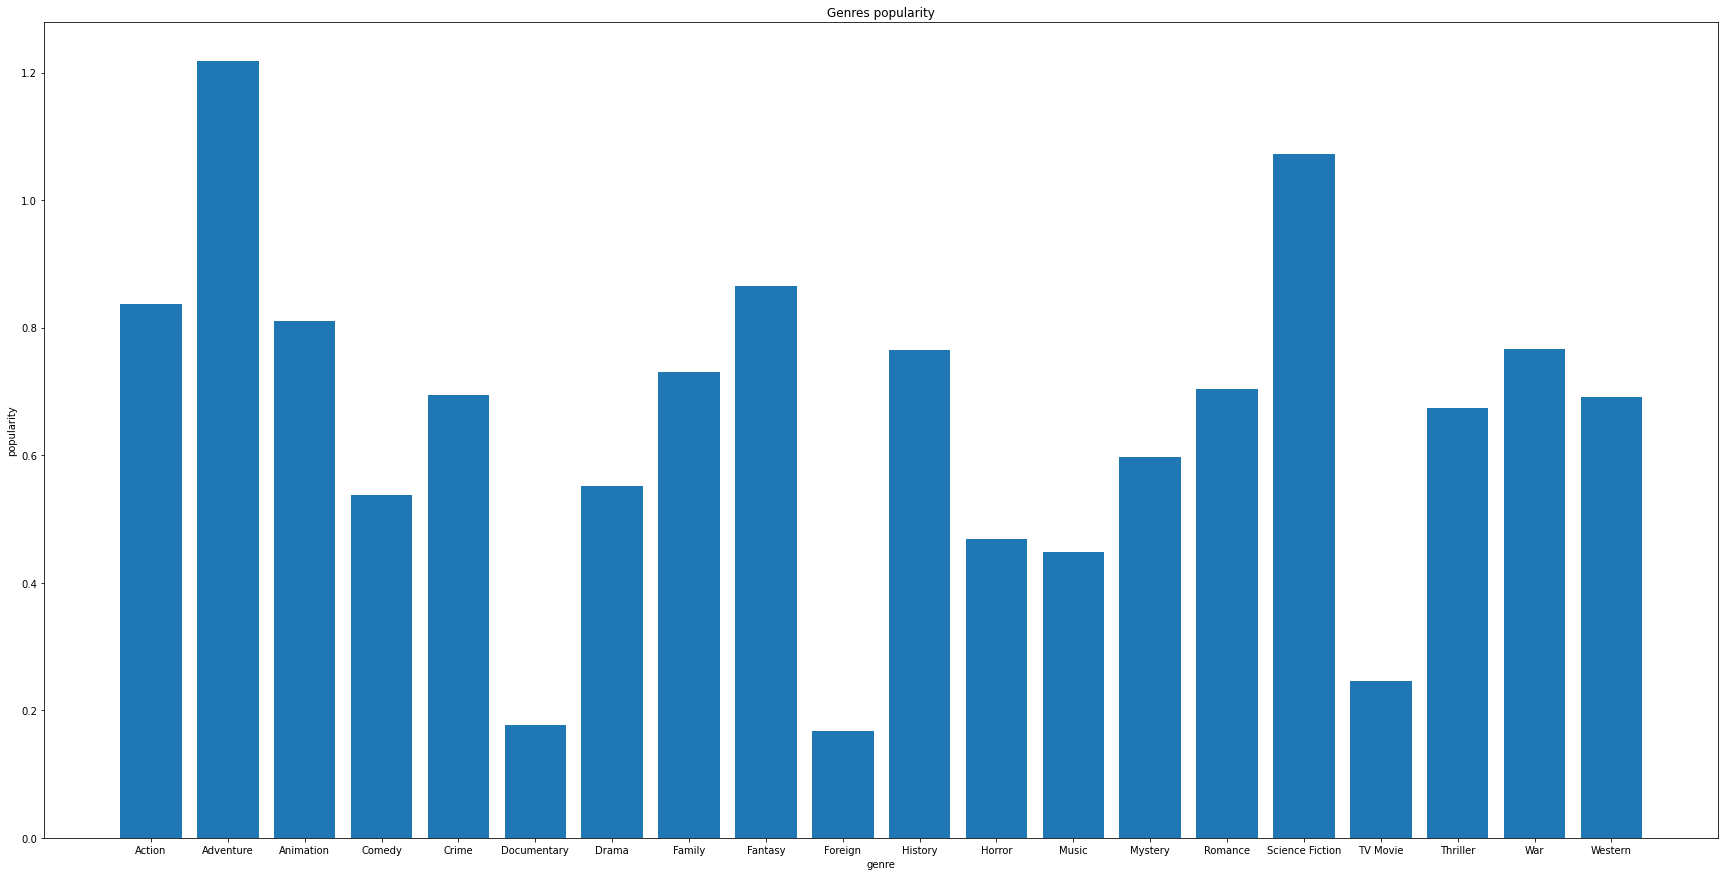

In [25]:
plt.subplots(figsize=(30,15))
plt.title('Genres popularity')
plt.xlabel('genre')
plt.ylabel('popularity')
plt.bar(g_popularity.index,g_popularity);

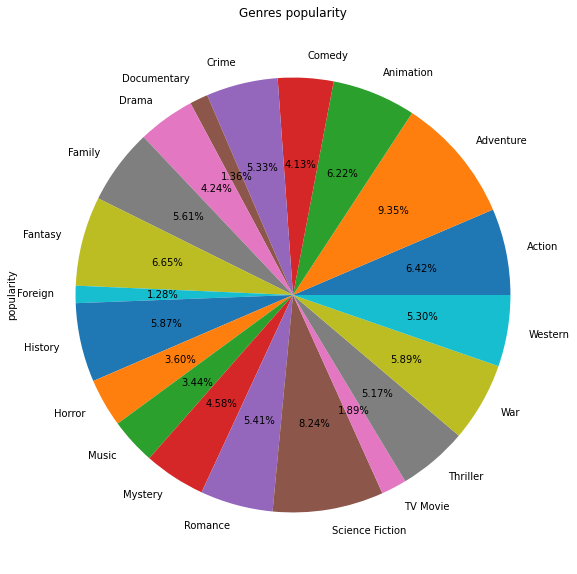

In [26]:
sizes= [1500, 600, 500, 300]
g_popularity.plot.pie(y=g_popularity.index,figsize=(10,10),autopct='%1.2f%%')
plt.title('Genres popularity');

 Clearly we can see that Adventure and Science fiction genres are the most popular.        

### Research Question 2 What kinds of properties are associated with movies that have high revenues?



Firstly we have to find find the highest movies in revenues:

In [27]:
highest_movies_revenues=df.sort_values(by=['revenue']).tail(100) # in this line we took the last 100 movies after sorting them by revenue in ascending order
highest_movies_revenues.head(5)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7073,0.672946,30000000.0,611899420.0,The Passion of the Christ,127,Drama,2004-02-25,457,6.8,2004,3.463336e+07,7.064045e+08
629,24.949134,165000000.0,621752480.0,Interstellar,169,Adventure,2014-11-05,6498,8.0,2014,1.519800e+08,5.726906e+08
7389,2.764535,150000000.0,623722818.0,Ratatouille,111,Animation,2007-06-22,2434,7.3,2007,1.577503e+08,6.559497e+08
1920,5.704860,200000000.0,623933331.0,Iron Man 2,124,Adventure,2010-04-28,4920,6.6,2010,2.000000e+08,6.239333e+08
4381,2.592896,225000000.0,624026776.0,Men in Black 3,106,Action,2012-05-23,3142,6.1,2012,2.136925e+08,5.926659e+08


Now let's draw histograms for some features to check which properties are associated with movies that have high revenues:

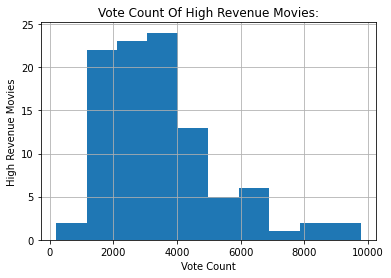

In [28]:
highest_movies_revenues.vote_count.hist()
plt.title("Vote Count Of High Revenue Movies:")
plt.xlabel("Vote Count")
plt.ylabel("High Revenue Movies");

It seems that higher revenue movies receive vote count between 2200 and 4000 votes.

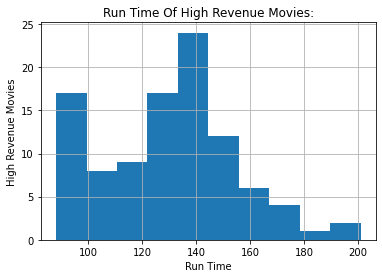

In [29]:
highest_movies_revenues.runtime.hist()
plt.title("Run Time Of High Revenue Movies:")
plt.xlabel("Run Time")
plt.ylabel("High Revenue Movies");

Higher revenue movies have run time between 130 and 140 min.

### Research Question 3: Does the movies high budget receive more votes?




let's first check the budget column:

In [30]:
df['budget'].sort_values()

3065            1.0
1151            1.0
2618            1.0
3581            1.0
8944            2.0
           ...     
6570    270000000.0
14      280000000.0
7387    300000000.0
3375    380000000.0
2244    425000000.0
Name: budget, Length: 10842, dtype: float64

clearly we can see that  there are some movies with 1 or 2 budget which does not make sense, let's drop any budget that small than 1000:

In [31]:
df=df[df['budget']>=1000] # droping the rows
df['budget'].sort_values()

6933         2500.0
1915         3500.0
2396         5000.0
1817         5000.0
7813         6000.0
           ...     
6570    270000000.0
14      280000000.0
7387    300000000.0
3375    380000000.0
2244    425000000.0
Name: budget, Length: 10783, dtype: float64

let's sort the data by  budget:

In [32]:
df.sort_values(by='budget')


,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6933,0.072625,2500.0,3.991138e+07,Offside,93,Drama,2006-05-26,12,6.5,2006,2.704173e+03,0.000000e+00
1915,0.019105,3500.0,3.991138e+07,ThanksKilling,66,Comedy,2009-11-17,10,4.1,2009,3.557402e+03,0.000000e+00
2396,0.006640,5000.0,3.991138e+07,The American Matrix - Age Of Deception,120,Documentary,2010-01-01,11,4.1,2010,5.000000e+03,0.000000e+00
1817,0.164377,5000.0,3.991138e+07,The Hunt for Gollum,38,Action,2009-05-04,16,5.9,2009,5.082002e+03,0.000000e+00
7813,0.065543,6000.0,6.000000e+03,Loose Change: Final Cut,129,Documentary,2007-11-11,12,5.1,2007,6.310011e+03,6.310011e+03
...,...,...,...,...,...,...,...,...,...,...,...,...
6570,1.957331,270000000.0,3.910812e+08,Superman Returns,154,Adventure,2006-06-28,834,5.3,2006,2.920507e+08,4.230205e+08
14,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,141,Action,2015-04-22,4304,7.4,2015,2.575999e+08,1.292632e+09
7387,4.965391,300000000.0,9.610000e+08,Pirates of the Caribbean: At World's End,169,Adventure,2007-05-19,2626,6.8,2007,3.155006e+08,1.010654e+09
3375,4.955130,380000000.0,1.021683e+09,Pirates of the Caribbean: On Stranger Tides,136,Adventure,2011-05-11,3180,6.3,2011,3.683713e+08,9.904175e+08


Now let's divide the budget into two groups:

We will first get the median of the budget column

In [33]:
median=df['budget'].median()
median

14655309.268492898

Now let's split the budget into two groups, low budget and high budget:

In [34]:
low = df.query('budget < {}'.format(median)) # low: budget that are less than median
high = df.query('budget >= {}'.format(median))#high: budget that are more than or euqal to median

mean_budget_low = low['vote_count'].mean() # taking the mean of low budget movies
mean_budget_high = high['vote_count'].mean() # taking the mean of high budget movies

Now let's compare between the two groups:

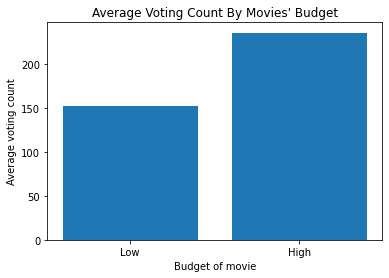

In [35]:
locations = [1, 2]
heights = [mean_budget_low, mean_budget_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Voting Count By Movies\' Budget')
plt.xlabel('Budget of movie')
plt.ylabel('Average voting count');

The above Bar plot shows that higher budget movies receive better voting.

<a id='conclusions'></a>
## Conclusions
In conclusion, I got valuable information about the data set which we can take advantage of to make a great prediction of future movies however, I should remind you that these findings are tentative because I still did not use inferential statistics or machine learning and that's what I plan to make in the future work. Also, it's necessary to note that there is unintentional bias in the selected sample, because there are some foreign movies that are not selected such as Arabic or Turkish movies. Eventually, the findings are so helpful for movies producers and we can clarify the most important findings in five points:   

- Adventure and Science fiction genres have the most popularity.
- TV movie, Documentary and Forign genres have the lowst popularity. 
- The most revenuable movies are not the one with highest voting count. 
- Most of the higher revenue movies have run time between 130-140 minutes.
- The higher budget that movie will have the more voting that it will receive.